In [1]:
from __future__ import division, print_function, unicode_literals

# We need to import key libraries that we're going to use.  
# For now this is just numpy, which is our linear algebra library
import numpy as np

np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline 
# This command figures show up in the notebook.  It's a "magic" command...
# Typically, this now happens by default so it is often an unnecessary command, but is good for standardization.
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "hw1"

import os
if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory didn\'t exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.') 
    
def savepdf(fig,name):
    fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.pdf')

Figure directory exists.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [3]:
def generate_students_pass_fail(n=300,pass_line=75,random_seed=42):
    def sigmoid(x):
        return 1./(1.+np.exp(-x))
    # Generates noisy data along curved line.
    # The curve is non-linear and the noise/variance is heteroskedastic and non-gaussian, so it breaks
    # pretty much all classical statistical model assumptions.  It's both pretty fun and kind of 
    # disturbing how easy it is to do that.
    np.random.seed(random_seed)
    x = 6*np.random.rand(n, 1)
    x = np.sort(x,axis=0)
    score = 100* sigmoid(-2+x+.4*np.random.randn(n,1))+5*np.random.randn(n,1)
    y=score>pass_line
    y=y.reshape(-1)
    return x,y

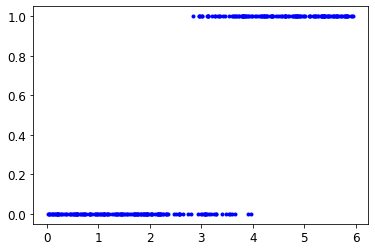

(300, 1)


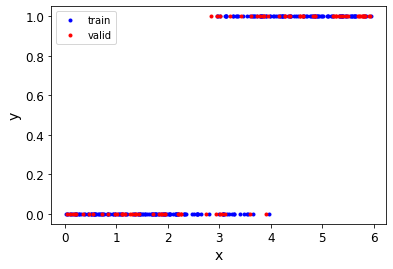

In [18]:
x,y=generate_students_pass_fail()
plt.plot(x, y, "b.")
plt.show()

n_train=220
n_valid=80
permutation=np.random.permutation(300)
x_permute=x[permutation]
y_permute=y[permutation]
x_train=x_permute[:n_train]
x_valid=x_permute[n_train:]
y_train=y_permute[:n_train]
y_valid=y_permute[n_train:]
plt.plot(x_train,y_train,'b.',label='train')
plt.plot(x_valid,y_valid,'r.',label='valid')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis('tight')
plt.show()

In [5]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

logistic_err = round(1-logistic_model.score(x_valid, y_valid), 3)
print("logistic validation error is " + str(logistic_err))

logistic validation error is 0.075


/Users/ruiyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

best_accuracy = 0
k_best = 1
for k in range(1, 30):
    knn_model=KNeighborsClassifier(k)
    knn_model.fit(x_train,y_train)
    cur_score = knn_model.score(x_valid, y_valid)
    
    if  cur_score > best_accuracy :
        best_accuracy = cur_score
        k_best = k
best_valid_error = round(1-best_accuracy, 3)
print( "the best KNN validation error is " + str(best_valid_error) + " (when k = " + str(k_best) + ")")

the best KNN validation error is 0.062 (when k = 14)


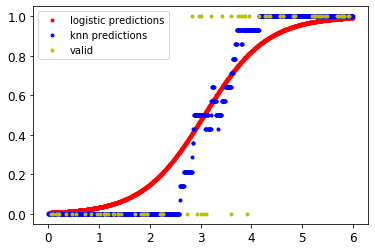

I prefer knn model in this case for lower validation error, therefore higher accuracy


In [29]:
knn_model = KNeighborsClassifier(k_best)
knn_model.fit(x_train, y_train)
x_interpolate = np.linspace(0,6,num=1001)
x_interpolate = x_interpolate.reshape(-1,1)
plt.plot(x_interpolate, logistic_model.predict_proba(x_interpolate)[:,1], 'r.', label='logistic predictions')
plt.plot(x_interpolate, knn_model.predict_proba(x_interpolate)[:,1], 'b.', label = 'knn predictions')
plt.plot(x_valid,y_valid,'y.',label='valid')
plt.legend()
plt.show()
print("I prefer knn model in this case for lower validation error, therefore higher accuracy")